# Time Series Forecasting

## Notebook Details
- __notebook name__: `'COVID-19 OUTBREAK'
- __notebook version/date__: `1.0.0`/`17-04-20`
- __notebook server__: Google Colab
- __python version__: `3.6`
- __pytorch version__: `1.1.0`
- __keras version__: 1.1.0

In [ ]:
from google.colab import files
file = files.upload()

TypeError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from folium import plugins
import warnings
warnings.filterwarnings('ignore')

In [ ]:
daily = pd.read_csv('nation_level_daily.csv')
daily['date'] = pd.to_datetime(daily['date'] + ' 2020')

# get no. of active cases
daily['totalactive'] = daily['totalconfirmed'] - daily['totaldeceased'] - daily['totalrecovered']

# Deaths / 100 cases
daily['deaths/100 cases'] = round((daily['totaldeceased'] / daily['totalconfirmed'])*100, 2)
# Recovered / 100 cases
daily['recovered/100 cases'] = round((daily['dailyrecovered'] / daily['totalconfirmed'])*100, 2)
# Deaths / 100 recovered
daily['deaths/100 recovered'] = round((daily['totaldeceased'] / daily['totalconfirmed'])*100, 2)
daily

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered,totalactive,deaths/100 cases,recovered/100 cases,deaths/100 recovered
0,1,0,0,2020-01-30,1,0,0,1,0.00,0.00,0.00
1,0,0,0,2020-01-31,1,0,0,1,0.00,0.00,0.00
2,0,0,0,2020-02-01,1,0,0,1,0.00,0.00,0.00
3,1,0,0,2020-02-02,2,0,0,2,0.00,0.00,0.00
4,1,0,0,2020-02-03,3,0,0,3,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
160,25561,492,19508,2020-07-08,769057,21147,476554,271356,2.75,2.54,2.75
161,25790,479,19408,2020-07-09,794847,21626,495962,277259,2.72,2.44,2.72
162,27762,520,20289,2020-07-10,822609,22146,516251,284212,2.69,2.47,2.69
163,27757,543,19981,2020-07-11,850366,22689,536232,291445,2.67,2.35,2.67


In [ ]:
fig = go.Figure(go.Bar(x= daily.date, y= daily.dailyrecovered, name='Daily Recovered'))
fig.add_trace(go.Bar(x=daily.date, y= daily.dailydeceased, name='Daily Deaths'))
fig.add_trace(go.Bar(x=daily.date, y= daily.dailyconfirmed, name='Daily Confirmed'))
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.add_annotation(
            x= "2020-04-03",
            y=23000,
           text="<b>Lockdown 1<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-04-23",
            y=23000,
            text="<b>Lockdown 2<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x="2020-05-10",
            y=23000,
           text="<b>Lockdown 3<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-05-24",
            y=23000,
            text="<b>Lockdown 4<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)

fig.update_layout(barmode='stack', 
                  xaxis={'categoryorder':'total descending'},
                 title_text='<b>Daily Cases (since 15 March)<b>',
                  title_x=0.5,legend_orientation="h",legend=dict(x= 0.3, y=1.1),
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke",
                  shapes=[
        
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-25",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-15",
            y0=0,
            x1="2020-05-03",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-04",
            y0=0,
            x1="2020-05-17",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-18",
            y0=0,
            x1="2020-05-31",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        )
    ]
)
fig.show()


Inference : Above graph contains the data of daily new confirmed , new deaths and new recovered cases. Similar to total cases graph here also daily confirmed and daily recovered cases are increasing exponentially but daily confirmed cases has steeper curve as compared to the curve of daily recovered. Lets see these cases individually.

In [ ]:
fig = go.Figure([go.Bar(x= daily.date, y= daily.dailyconfirmed,marker_color='teal')])
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))

fig.add_annotation(
            x= "2020-04-03",
            y=12500,
           text="<b>Lockdown 1<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-04-23",
            y=12500,
            text="<b>Lockdown 2<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x="2020-05-10",
            y=12500,
           text="<b>Lockdown 3<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-05-24",
            y=12500,
            text="<b>Lockdown 4<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)

fig.update_layout(
    title_text='<b>Daily New Confirmed Cases <b>',
                  title_x=0.5,
                 paper_bgcolor='aqua',
                 plot_bgcolor = "aqua",
    shapes=[
        
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-25",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-15",
            y0=0,
            x1="2020-05-03",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-04",
            y0=0,
            x1="2020-05-17",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-18",
            y0=0,
            x1="2020-05-31",
            y1=1,
            fillcolor="lightskyblue",
            opacity=0.5,
            layer="below",
            line_width=2,
        )
        
        
        
    ]
)

fig.show()

In [ ]:
fig = go.Figure([go.Bar(x= daily.date, y= daily.dailydeceased,marker_color='red')])
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))


fig.add_annotation(
            x= "2020-06-17",
            y= 2003,
            text="<b>Highest (17 June,2003 Deaths)<b>",showarrow= True,font=dict(
            family="Courier New, monospace",
            size=15,
            color="blue"
            ),
        align="center",)

fig.update_layout(
    title_text='<b>Daily New Deaths (since 15 March)<b>',
                  title_x=0.5,
                 paper_bgcolor='rgb(255,223,0)',
                 plot_bgcolor = "rgb(255,223,0)",
    shapes=[
        
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-25",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="lightyellow",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-15",
            y0=0,
            x1="2020-05-03",
            y1=1,
            fillcolor="lightyellow",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-04",
            y0=0,
            x1="2020-05-17",
            y1=1,
            fillcolor="lightyellow",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-18",
            y0=0,
            x1="2020-05-31",
            y1=1,
            fillcolor="lightyellow",
            opacity=0.3,
            layer="below",
            line_width=2,
        )
        
        
        
    ]
)

fig.show()

In [ ]:
fig = go.Figure([go.Bar(x= daily.date, y= daily.dailyrecovered,marker_color='blue')])
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))

fig.update_layout(
    title_text='<b>Daily New Recovered Cases (since 15 March)<b>',
                  title_x=0.5,
                 paper_bgcolor='aquamarine',
                 plot_bgcolor = "aquamarine",
    shapes=[
        
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-25",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-15",
            y0=0,
            x1="2020-05-03",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-04",
            y0=0,
            x1="2020-05-17",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.5,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-18",
            y0=0,
            x1="2020-05-31",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.5,
            layer="below",
            line_width=2,
        )
        
        
        
    ]
)

fig.show()

In [ ]:
p_df = pd.read_csv('patients_data.csv')
# fixing date format
for col in ['dateannounced', 'statuschangedate']:
    p_df[col] = pd.to_datetime(p_df[col], format='%Y/%m/%d')
# fix nationality values
p_df['nationality'] = p_df['nationality'].replace('Indian', 'India')
# first few rows
p_df.head()

,agebracket,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,entryid,gender,nationality,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,20.0,NaN,Recovered,2020-01-30,Thrissur,Thrissur,Kerala,0,F,India,Travelled from Wuhan,1.0,1.0,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,KL,KL-TS-P1,2020-02-14,Imported
1,NaN,NaN,Recovered,2020-02-02,Alappuzha,Alappuzha,Kerala,0,NaN,India,Travelled from Wuhan,1.0,2.0,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,KL,KL-AL-P1,2020-02-14,Imported
2,NaN,NaN,Recovered,2020-03-02,Kasaragod,Kasaragod,Kerala,0,NaN,India,Travelled from Wuhan,1.0,3.0,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,2020-02-14,Imported
3,45.0,NaN,Recovered,2020-02-03,East Delhi (Mayur Vihar),East Delhi,Delhi,0,M,India,"Travelled from Austria, Italy",1.0,4.0,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,DL,DL-P1,2020-03-15,Imported
4,24.0,NaN,Recovered,2020-02-03,Hyderabad,Hyderabad,Telangana,0,M,India,"Travelled from Dubai to Bangalore on 20th Feb,...",1.0,5.0,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,2020-02-03,Imported


In [ ]:
def print_missing(col):
    print('Total no. of values :', p_df.shape[0], \
          '\nNo. of missing values :', p_df.shape[0]-p_df[[col]].dropna().shape[0], \
          '\nNo. of available values :', p_df.shape[0]-(p_df.shape[0]-p_df[[col]].dropna().shape[0]))
print_missing('agebracket')
df = p_df['agebracket']
px.histogram(p_df, x='agebracket', color_discrete_sequence = ['#35495e'], nbins=50, title='Distribution of ages of confirmed patients')

Total no. of values : 168148 
No. of missing values : 95694 
No. of available values : 72454


In [ ]:
def print_missing_vals():
    print('Total no. of values :', p_df.shape[0], 
          '\nNo. of missing values :', p_df.shape[0]-temp.shape[0], 
          '\nNo. of available values :', p_df.shape[0]-(p_df.shape[0]-temp.shape[0]))

fig = make_subplots(
    rows=1, cols=2, column_widths=[0.8, 0.2],
    subplot_titles = ['Gender vs Age', ''],
    specs=[[{"type": "histogram"}, {"type": "pie"}]]
)
temp = p_df[['agebracket', 'gender']].dropna()
print_missing_vals()
gen_grp = temp.groupby('gender').count()
fig.add_trace(go.Histogram(x=temp[temp['gender']=='F']['agebracket'], nbinsx=50, name='Female', marker_color='#6a0572'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['gender']=='M']['agebracket'], nbinsx=50, name='Male', marker_color='#39065a'), 1, 1)
fig.add_trace(go.Pie(values=gen_grp.values.reshape(-1).tolist(), labels=['Female', 'Male'], marker_colors = ['#6a0572', '#39065a']),1, 2)
fig.update_layout(showlegend=False)
fig.update_layout(barmode='stack')
fig.data[2].textinfo = 'label+text+value+percent'
fig.show()

Total no. of values : 168148 
No. of missing values : 96417 
No. of available values : 71731


In [ ]:
fig = make_subplots(
    rows=1, cols=2, column_widths=[0.8, 0.2],
    subplot_titles = ['Cases vs Age', ''],
    specs=[[{"type": "histogram"}, {"type": "pie"}]]
)
temp = p_df[['agebracket', 'currentstatus']].dropna()
print_missing_vals()
gen_grp = temp.groupby('currentstatus').count()
fig.add_trace(go.Pie(values=gen_grp.values.reshape(-1).tolist(), labels=['Deceased', 'Hospitalized', 'Recovered'], 
                     marker_colors = ['#fd0054', '#393e46', '#40a798'], hole=.3),1, 2)
fig.add_trace(go.Histogram(x=temp[temp['currentstatus']=='Deceased']['agebracket'], nbinsx=50, name='Deceased', marker_color='#fd0054'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['currentstatus']=='Recovered']['agebracket'], nbinsx=50, name='Recovered', marker_color='#40a798'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['currentstatus']=='Hospitalized']['agebracket'], nbinsx=50, name='Hospitalized', marker_color='#393e46'), 1, 1)
fig.update_layout(showlegend=False)
fig.update_layout(barmode='stack')
fig.data[0].textinfo = 'label+text+value+percent'
fig.show()

Total no. of values : 168148 
No. of missing values : 95694 
No. of available values : 72454


In [ ]:
p_df['typeoftransmission'] = p_df['typeoftransmission'].replace('Imported ', 'Imported')
p_df['typeoftransmission'] = p_df['typeoftransmission'].replace('Unknown', 'TBD')
temp = pd.DataFrame(p_df[['typeoftransmission']].groupby('typeoftransmission')['typeoftransmission'].count())
temp = temp.dropna()
temp.columns = ['count']
temp = temp.reset_index().sort_values(by='count')

print('Total no. of values :', p_df.shape[0], '\nNo. of missing values :', p_df.shape[0]-temp['count'].sum(), '\nNo. of available values :', temp['count'].sum())

fig = px.bar(temp, x='count', y='typeoftransmission', orientation='h', text='count', width=600, height=300,
       color_discrete_sequence = ['#35495e'], title='Type of transmission')
fig.update_xaxes(title='')
fig.update_yaxes(title='')
fig.show()

Total no. of values : 168148 
No. of missing values : 165158 
No. of available values : 2990


# Import DataSet Containing the Cumulative Cases For Covid-19 across various states in the country from 21'st March to 2nd September  

In [ ]:
df_india = pd.read_csv('datasets_557629_1459761_covid_19_india.csv',parse_dates=True)
df_india.drop(['Sno'],axis=1,inplace=True)
df_latest = df_india[df_india['Date']=="02/09/20"]
print("Total No Of Confirmed Cases In The Country: ",df_latest['Confirmed'].sum())

Total No Of Confirmed Cases In The Country:  3769523


**Displaying the Active Covid-19 cases (Excluding the recovered and the dead) of all the states in descending order **

In [ ]:
df_latest['Active Cases'] = df_latest['Confirmed'] - df_latest['Cured'] - df_latest['Deaths']
Tot_Cases = df_latest.groupby('State/UnionTerritory')['Active Cases'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

,Active Cases
State/UnionTerritory,
Maharashtra,198866
Andhra Pradesh,101210
Karnataka,91018
Uttar Pradesh,55538
Tamil Nadu,52379
Telengana,32341
Odisha,25288
West Bengal,24822
Assam,24514


In [ ]:
df_india_group = df_latest.groupby('State/UnionTerritory')['Confirmed','Cured','Deaths','Active Cases'].sum()
df_india_group['mortality_rate'] =  round((df_india_group['Deaths']/df_india_group['Confirmed'])*100, 2)
df_india_group['recovery_rate'] =  round((df_india_group['Cured']/df_india_group['Confirmed'])*100, 2)

**Displaying the geographical latitudes and longitudes of each state**

In [ ]:
India_coord = pd.read_excel('Indian Coordinates.xlsx')
India_coord.set_index("State/UnionTerritory", inplace = True)
df_full = pd.merge(df_india_group,India_coord,left_index=True, right_index=True)
df_full.reset_index(level=0, inplace=True)
df_full
df_full.style\
    .background_gradient(cmap="Reds", subset=['Confirmed', 'Active Cases'])\
    .background_gradient(cmap="Blues", subset=['Deaths', 'mortality_rate'])\
    .background_gradient(cmap="Greens", subset=['Cured', 'recovery_rate'])

,State/UnionTerritory,Confirmed,Cured,Deaths,Active Cases,mortality_rate,recovery_rate,Latitude,Longitude
0,Andaman and Nicobar Islands,3160,2714,46,400,1.460000,85.890000,11.667026,92.735983
1,Andhra Pradesh,445139,339876,4053,101210,0.910000,76.350000,14.750429,78.570026
2,Arunachal Pradesh,4212,2979,7,1226,0.170000,70.730000,27.100399,93.616601
3,Assam,111724,86895,315,24514,0.280000,77.780000,26.749981,94.216667
4,Bihar,138349,121560,621,16168,0.450000,87.860000,25.785414,87.479973
5,Chandigarh,4550,2551,57,1942,1.250000,56.070000,30.719997,76.780006
6,Chhattisgarh,33387,17567,287,15533,0.860000,52.620000,22.090420,82.159987
7,Delhi,177060,156728,4462,15870,2.520000,88.520000,28.669993,77.230004
8,Goa,18006,13850,194,3962,1.080000,76.920000,15.491997,73.818001
9,Gujarat,97629,78887,3034,15708,3.110000,80.800000,22.258700,71.192400


**Creating a zoomable map using Folium package.The magnitude of the cases are represented by the radius of the circles**

In [ ]:
indiaMap = folium.Map(location=[20,70], tiles="Stamen Terrain", zoom_start=4)
for lat, lon, value1,value2,name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Confirmed'],df_full['Deaths'],df_full['State/UnionTerritory']):
    folium.CircleMarker([lat, lon],
                        radius= (int((np.log(value1+1.00001))))*2,
                        popup = ('<strong>States</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed</strong>: ' + str(value1) + '<br>'),
                        color='red',
                        fill_color='red',
                        fill_opacity=0.5 ).add_to(indiaMap)
    folium.CircleMarker([lat, lon],
                        radius= (int((np.log(value2+1.00001))))*2,
                        popup = ('<strong>States</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Deaths</strong>: ' + str(value2) + '<br>'),
                        color='blue',
                        fill_color='#blue',
                        fill_opacity=0.4 ).add_to(indiaMap)
indiaMap

In [ ]:
cnf, dth, rec, act = ['#393e46', '#ff2e63', '#21bf73', '#fe9801'] 
temp = df_full[['Active Cases', 'Deaths', 'Cured']]
temp = temp.iloc[1:,:]
# rename columns
temp.columns = ['active', 'deceased', 'recovered']
# melt into longer format
tm = temp.melt(value_vars=['active', 'deceased', 'recovered'])
# plot
fig_1 = px.treemap(tm,names="variable",values="value",color_discrete_sequence=[act, rec, dth],title='Latest stats')
fig_1.show()

**Confirmed Vs Recovered Figures**

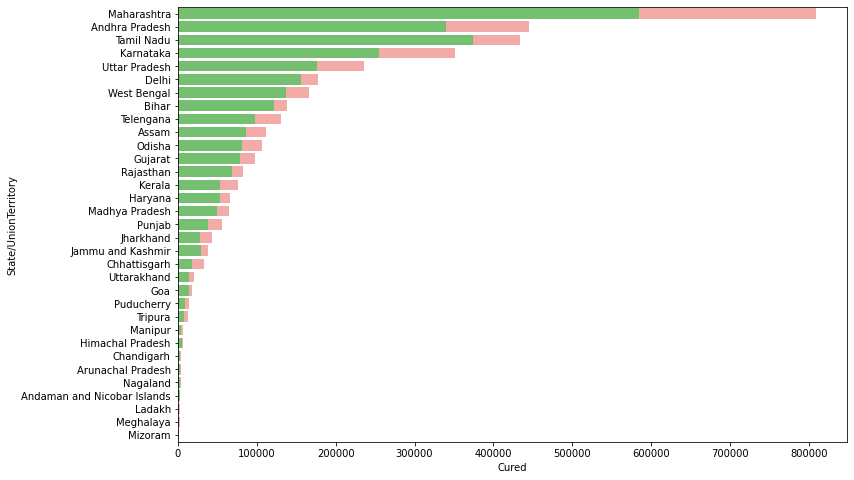

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['State/UnionTerritory','Confirmed','Cured','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="r")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="g")

**The Rise of the Coronavirus cases (State-Wise)**

In [ ]:
import plotly
plotly.io.renderers.default = 'colab'
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_india['Date'], y = df_india['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [ ]:
from google.colab import files
file = files.upload()

Saving worldwide-aggregate.csv to worldwide-aggregate (1).csv


Taking the aggregated Confirmed cases all across the world from 22/01/20 to 05/09/20

In [ ]:
df_aggregate = pd.read_csv('worldwide-aggregate.csv')
#df_aggregate.Date = pd.to_datetime(df_aggregate.Date)
df_aggregate = df_aggregate.set_index('Date')
df_aggregate = df_aggregate['Confirmed']
print(type(df_aggregate.index))

<class 'pandas.core.indexes.base.Index'>


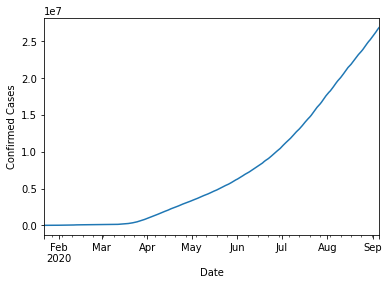

In [ ]:
df_aggregate.plot()
plt.ylabel('Confirmed Cases')
plt.show()

In [ ]:
data_new = df_aggregate.resample('D').first().fillna(0)

MLPRegressor(activation='relu', alpha=0.0005, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[32, 32, 10], learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=50000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=26, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

# PROPHET METHOD
Forecasting is often employed in many organizations such as supply chain management, sales and economics not just in the weather industry.Prophet package was first developed by Facebook's Core Data Science team as an open source tool for forecasting. Automated forecasting can be inflexible as it fails incorporating an analysts domain knowledge.Prophet begins by modeling a time series using the analysts specified parameters, producing forecasts and then evaluating them.
Using Prophet method to forecast the trends in the next 6 months by following certain trends.Non-linear.First fit the model based on pr_data.Make a future dataframe and set period = 180. Call predict to make predictions on the future dataframe and store it in forecast.
yhat- uncertainity interval along with it's lower and upper bounds.
trends - long-term increase or decrease in the data.
weekly - weekly trends.

In [ ]:
prophet_df = pd.read_csv('covid_19_india.csv',parse_dates=['Date'], dayfirst=True)
prophet_df = prophet_df[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]
prophet_df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
7781,2020-10-27,Telengana,213466,1315,232671
7782,2020-10-27,Tripura,28153,344,30293
7783,2020-10-27,Uttarakhand,55663,1001,60744
7784,2020-10-27,Uttar Pradesh,438521,6904,472077


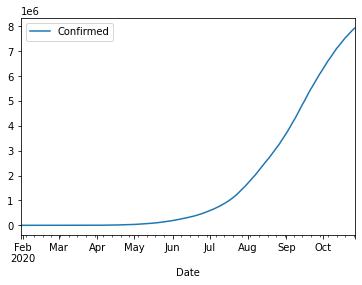

In [ ]:
prophet_df['Date'] = pd.to_datetime(prophet_df['Date'])
prophet_conf_case = prophet_df.groupby(['Date'],as_index=False)['Confirmed'].sum()
prophet_conf_case = prophet_conf_case.set_index('Date')
prophet_conf_case.plot()

In [ ]:
prophet_conf_case = prophet_conf_case.resample('D').first().fillna(0)
pr_data = prophet_conf_case.reset_index()
pr_data.columns = ["ds","y"]
train_data = pr_data[:212]
test_data = pr_data[212:]
train_data

,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
207,2020-08-24,3106348
208,2020-08-25,3167323
209,2020-08-26,3234474
210,2020-08-27,3310234


In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
#Prophet algorith helps to predict the time series data
pm = Prophet()
#training the model
pm.fit(train_data)
future = pm.make_future_dataframe(60)
#predicting provided dayes
pm_forecast = pm.predict(future)
pm_forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-1.629087e+03,-3.556388e+04,3.730310e+04,-1.629087e+03,-1.629087e+03,1116.924043,1116.924043,1116.924043,1116.924043,1116.924043,1116.924043,0.0,0.0,0.0,-5.121631e+02
1,2020-01-31,-1.570138e+03,-3.637228e+04,3.544020e+04,-1.570138e+03,-1.570138e+03,2319.366097,2319.366097,2319.366097,2319.366097,2319.366097,2319.366097,0.0,0.0,0.0,7.492277e+02
2,2020-02-01,-1.511190e+03,-3.941272e+04,3.342996e+04,-1.511190e+03,-1.511190e+03,-1162.885275,-1162.885275,-1162.885275,-1162.885275,-1162.885275,-1162.885275,0.0,0.0,0.0,-2.674075e+03
3,2020-02-02,-1.452241e+03,-3.846503e+04,3.340886e+04,-1.452241e+03,-1.452241e+03,-392.083907,-392.083907,-392.083907,-392.083907,-392.083907,-392.083907,0.0,0.0,0.0,-1.844325e+03
4,2020-02-03,-1.393292e+03,-3.594669e+04,3.529675e+04,-1.393292e+03,-1.393292e+03,-273.124908,-273.124908,-273.124908,-273.124908,-273.124908,-273.124908,0.0,0.0,0.0,-1.666417e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2020-10-23,6.386302e+06,6.094875e+06,6.692615e+06,6.100178e+06,6.689800e+06,2319.366097,2319.366097,2319.366097,2319.366097,2319.366097,2319.366097,0.0,0.0,0.0,6.388622e+06
268,2020-10-24,6.442037e+06,6.145391e+06,6.759582e+06,6.147823e+06,6.753524e+06,-1162.885275,-1162.885275,-1162.885275,-1162.885275,-1162.885275,-1162.885275,0.0,0.0,0.0,6.440874e+06
269,2020-10-25,6.497772e+06,6.191293e+06,6.823239e+06,6.194506e+06,6.817274e+06,-392.083907,-392.083907,-392.083907,-392.083907,-392.083907,-392.083907,0.0,0.0,0.0,6.497380e+06
270,2020-10-26,6.553507e+06,6.236727e+06,6.883553e+06,6.240500e+06,6.885079e+06,-273.124908,-273.124908,-273.124908,-273.124908,-273.124908,-273.124908,0.0,0.0,0.0,6.553234e+06


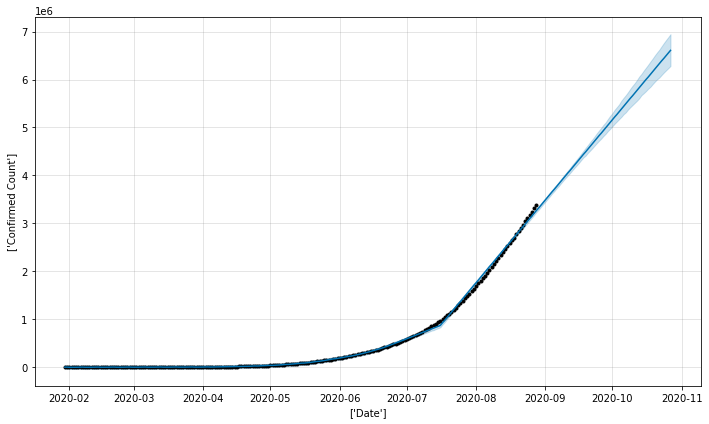

In [ ]:
import plotly.offline as py
fig = plot_plotly(pm,pm_forecast)
py.iplot(fig)
# Plot the prophet forecaast
fig = pm.plot(pm_forecast,xlabel=['Date'],ylabel=['Confirmed Count'])

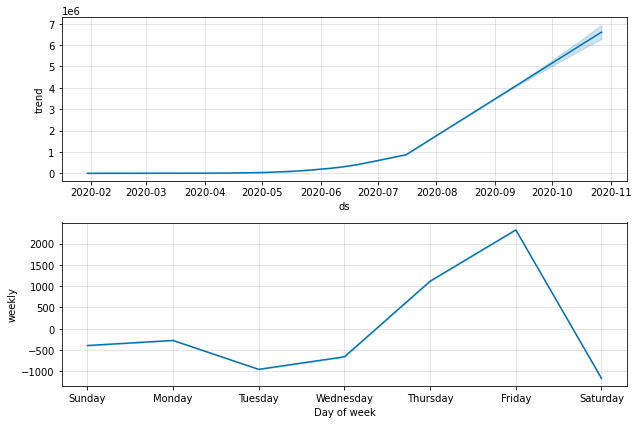

In [ ]:
figure = pm.plot_components(pm_forecast)

In [ ]:
predictions_df = pm_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
results_df = predictions_df.merge(test_data)
MAPE_prophet = mean_absolute_percentage_error(results_df['yhat'].iloc[0], results_df['y'].iloc[0])
MAPE_prophet

4.345022036188479

According to the Prophet model, based on the current trends the no of cases is expected to rise to 10.84 million by September 2020. The light blue shaded area marks the uncertainity interval. We can break this down a bit further by calling the plot_components() method to inspect the forecast components.
It looks like the trend may be cyclical as seen in the rise-and-fall pattern. We can observe a sharp peak on Friday. This could probably be due to the fact that people are ignoring social distancing and are engaging in large gatherings despite their government's warnings.

# **Auto Regressive Integrated Moving Average**
ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

In [ ]:
from google.colab import files
file = files.upload()

Saving covid_19_india.csv to covid_19_india.csv


In [ ]:
covid_df = pd.read_csv('covid_19_india.csv',parse_dates=['Date'], dayfirst=True)
covid_df = covid_df[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]
covid_df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
7781,2020-10-27,Telengana,213466,1315,232671
7782,2020-10-27,Tripura,28153,344,30293
7783,2020-10-27,Uttarakhand,55663,1001,60744
7784,2020-10-27,Uttar Pradesh,438521,6904,472077


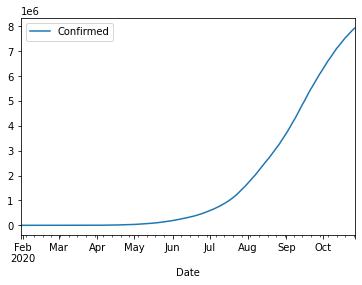

In [ ]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'])
conf_case_df = covid_df.groupby(['Date'],as_index=False)['Confirmed'].sum()
time_s_df_conf=conf_case_df.set_index('Date')
time_s_df_conf.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(conf_case_df.Confirmed)
test_result

(-1.366982685092139,
 0.597998733894832,
 16,
 255,
 {'1%': -3.4562572510874396,
  '10%': -2.5728461399461744,
  '5%': -2.8729420379793598},
 4605.05449076364)

In [ ]:
def adfuller_test(Total):
    result=adfuller(Total)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(covid_df['Confirmed'])

ADF Test Statistic : 6.642497590740332
p-value : 1.0
#Lags Used : 36
Number of Observations Used : 7749
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
covid_df['2nd_Diff']=covid_df['Confirmed']-covid_df['Confirmed'].shift(2)
covid_df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,2nd_Diff
0,2020-01-30,Kerala,0,0,1,NaN
1,2020-01-31,Kerala,0,0,1,NaN
2,2020-02-01,Kerala,0,0,2,1.0
3,2020-02-02,Kerala,0,0,3,2.0
4,2020-02-03,Kerala,0,0,3,1.0
...,...,...,...,...,...,...
7781,2020-10-27,Telengana,213466,1315,232671,228831.0
7782,2020-10-27,Tripura,28153,344,30293,-681420.0
7783,2020-10-27,Uttarakhand,55663,1001,60744,-171927.0
7784,2020-10-27,Uttar Pradesh,438521,6904,472077,441784.0


In [ ]:
adfuller_test(covid_df['2nd_Diff'].dropna())

ADF Test Statistic : -68.32500962592852
p-value : 0.0
#Lags Used : 36
Number of Observations Used : 7747
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


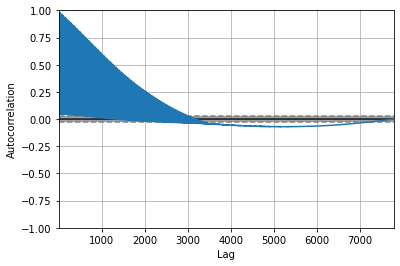

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(covid_df.Confirmed)
plt.show()

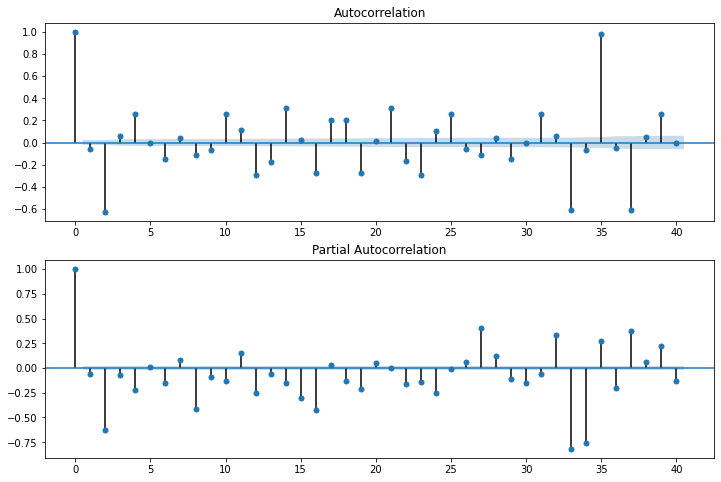

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(covid_df['2nd_Diff'].iloc[3:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(covid_df['2nd_Diff'].iloc[3:],lags=40,ax=ax2)

In [ ]:
time_s_df_conf = time_s_df_conf.resample('D').first().fillna(0)
time_s_df_conf.index

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2020-10-18', '2020-10-19', '2020-10-20', '2020-10-21',
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27'],
              dtype='datetime64[ns]', name='Date', length=272, freq='D')

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
p_values=range(1,6)
q_values=range(0,6)
train = time_s_df_conf[:212]
test = time_s_df_conf[212:]
for p in p_values:
    for q in q_values:
        order=(p,2,q)
        predictions=list()
        for i in range(len(test)):
            try:
                model=ARIMA(train,order)
                model_fit=model.fit(disp=0)
                pred_y=model_fit.forecast()[0]
                predictions.append(pred_y)
            except:
                continue
        if(len(predictions)>0):
            error=np.sqrt(mean_squared_error(test,predictions))
            print('ARIMA%s RMSE=%.2f'%(order,error))

ARIMA(1, 2, 0) RMSE=2798515.71
ARIMA(1, 2, 1) RMSE=2800147.09
ARIMA(1, 2, 2) RMSE=2801569.11
ARIMA(1, 2, 3) RMSE=2803416.95
ARIMA(1, 2, 4) RMSE=2802356.16
ARIMA(1, 2, 5) RMSE=2802378.79
ARIMA(2, 2, 0) RMSE=2801540.41
ARIMA(2, 2, 1) RMSE=2802030.26
ARIMA(2, 2, 2) RMSE=2802103.95
ARIMA(2, 2, 3) RMSE=2803710.00
ARIMA(3, 2, 0) RMSE=2801388.49
ARIMA(3, 2, 1) RMSE=2801975.06
ARIMA(3, 2, 2) RMSE=2802309.20
ARIMA(3, 2, 3) RMSE=2803813.84
ARIMA(4, 2, 0) RMSE=2801947.58
ARIMA(4, 2, 1) RMSE=2801652.61
ARIMA(5, 2, 0) RMSE=2801028.50
ARIMA(5, 2, 1) RMSE=2802493.47


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
train = time_s_df_conf[:212]
test = time_s_df_conf[212:]
model=ARIMA(train,order=(5,2,0))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.Confirmed   No. Observations:                  210
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -1836.840
Method:                       css-mle   S.D. of innovations           1516.566
Date:                Sun, 15 Nov 2020   AIC                           3687.679
Time:                        12:26:39   BIC                           3711.109
Sample:                    02-01-2020   HQIC                          3697.151
                         - 08-28-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                341.3961     55.441      6.158      0.000     232.734     450.058
ar.L1.D2.Confirmed     0.2317      0.068      3.394      0.001       0.098       0.365
ar.L2.D2.Confirmed    -0.5901      0.068     -8.740      0.000      -0.722      -0.458
ar.L3.D2.Confirmed     0.0375      0.078      0.479      0.633      -0.116       0.191
ar.L4.D2.Confirmed    -0.4074      0.067     -6.077      0.000      -0.539      -0.276
ar.L5.D2.Confirmed    -0.1763      0.074     -2.374      0.019      -0.322      -0.031
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7326           -0.8627j            1.1318           -0.1380
AR.2            0.7326           +0.8627j            1.1318            0.1380
AR.3           -0.4325           -1.1550j            1.2334           -0.3070
AR.4           -0.4325           +1.1550j            1.2334            0.3070
AR.5           -2.9112           -0.0000j            2.9112           -0.5000
-----------------------------------------------------------------------------
"""

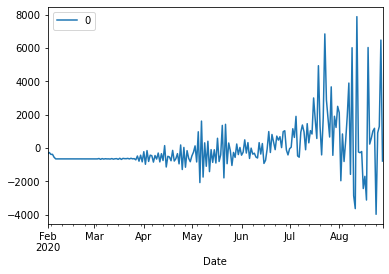

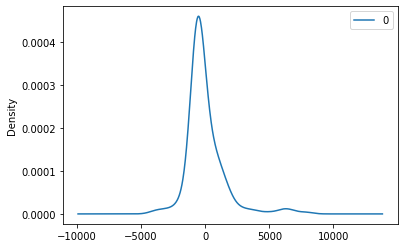

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()

In [ ]:
test = time_s_df_conf[212:]
forecast = model_fit.forecast(steps=60)[0]
forecast = pd.DataFrame(forecast,index = test.index,columns=['confirmed'])
forecast

,confirmed
Date,
2020-08-29,3.462473e+06
2020-08-30,3.534560e+06
2020-08-31,3.603442e+06
2020-09-01,3.671717e+06
2020-09-02,3.742954e+06
2020-09-03,3.817345e+06
2020-09-04,3.893162e+06
2020-09-05,3.969020e+06
2020-09-06,4.043716e+06


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1,subplot_titles=("Training Set", "Test Set", "Forecasting"),shared_xaxes=True,vertical_spacing=0.02)
fig.append_trace(go.Scatter(
    x=train.index,
    y=train['Confirmed'],
), row=1, col=1)
fig.append_trace(go.Scatter(
    x=test.index,
    y=test['Confirmed'],
), row=2, col=1)
fig.append_trace(go.Scatter(
    x=forecast.index,
    y=forecast['confirmed'],
), row=3, col=1)


fig.update_layout(height=600, width=600, title_text="Forecasting With ARIMA for Confirmed Cases")
fig.show()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mean_absolute_percentage_error(test,forecast)

3.045056334199064